## 24. Разделимые наименьшие квадраты

[Каханер–Моулер–Нэш] 

Пусть необходимо аппроксимировать $m$ точек данных $(t_i,\, y_i)$ $(i=1,2,\dots,m)$ с помощью функции
$$
   b(t) = c_1 + c_2 t + c_3 t^2 + c_4 e^{\lambda t}.
$$
Параметры $c_1,\dots,c_4$ входят линейно, а $\lambda$ нелинейно.
Рассмотрим матрицу
$$
A(\lambda) =
\left(
\begin{array}{cccc}
    1 & t_1 & t_1^2 & e^{\lambda t_1}  \\
    1 & t_2 & t_2^2 & e^{\lambda t_2}  \\
    \vdots & \vdots & \vdots & \vdots  \\
    1 & t_m & t_m^2 & e^{\lambda t_m}  \\
\end{array}
\right)
$$
и векторы
$$
y = 
\left(
\begin{array}{c}
   y_1 \\ y_2 \\ \vdots \\ y_m
\end{array}
\right),
\qquad
c = 
\left(
\begin{array}{c}
   c_1 \\ c_2 \\ c_3\\ c_4
\end{array}
\right).
$$
Тогда задачу наименьших квадратов можно поставить следующим образом:
$$
\min_{\lambda}  \min_{c}  \|A(\lambda) c - y\|_2.
$$
Для любого заданного $\lambda$ внутренний минимум можно найти линейным методом наименьших квадратов.
Для нахождения внешнего минимума можно воспользоваться методом одномерной минимизации.

В таблице ниже приведены две группы данных, к которым необходимо применить описанный подход.
Единственным ли образом определяются неизвестные параметры?
Изобразите данные на графике и постройте графики построенных моделей.

```
       t        y         y
             Группа 1  Группа 2
 -----------------------------------
     0.00     20.00     20.00
     0.25     51.58     24.13
     0.50     68.73     26.50
     0.75     75.46     27.13
     1.00     74.36     26.00
     1.25     67.09     23.13
     1.50     54.73     18.50
     1.75     37.98     12.13
     2.00     17.28      4.00
```


## Решение:


#### Подключим библиотеки:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
from scipy import optimize
from scipy.linalg import lstsq

#### Инициализируем массивы:

In [4]:
t=np.array([0.1,0.25,0.5,0.75,1,1.25,1.5,1.75,2])
y1=np.array([20,51.58,68.73,75.46,74.36,67.09,54.73,37.98,17.28])
y2=np.array([20,24.13,26.5,27.13,26,23.13,18.5,12.13,4])

#### Покажем на графике группы 1 и 2:

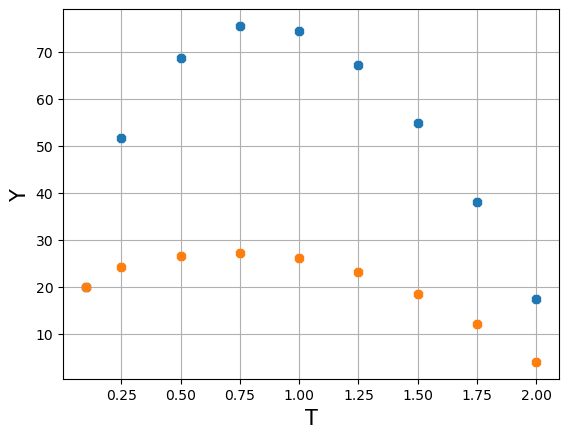

In [7]:
plt.plot(t, y1, '8')
plt.plot(t, y2, '8')
plt.xlabel('T', size=15)
plt.ylabel('Y', size=15)
plt.grid()
pass

 #### Создадим функцию `func` по нахождению $b(t)$:
$$
   b(t) = c_1 + c_2 t + c_3 t^2 + c_4 e^{\lambda t}.
$$

In [10]:
def func(_lambda, c, t):
    return c[0] + c[1] * t + c[2] * (t ** 2) + c[3] * (np.e ** (_lambda * t))

#### Создадим функцию-решатель `LSQM` с помощью МНК:

In [9]:
def LSQM(_lambda,group_y):
    A = np.empty((9,4), dtype = float) #Создаем матрицу A и заполняем ее в соответстивии с условием задачи
    A = np.array([[1,t[0],t[0]**2,np.e**(_lambda*t[0])],
                  [1,t[1],t[1]**2,np.e**(_lambda*t[1])],
                   [1,t[2],t[2]**2,np.e**(_lambda*t[2])],
                   [1,t[3],t[3]**2,np.e**(_lambda*t[3])],
                   [1,t[4],t[4]**2,np.e**(_lambda*t[4])],
                   [1,t[5],t[5]**2,np.e**(_lambda*t[5])],
                   [1,t[6],t[6]**2,np.e**(_lambda*t[6])],
                   [1,t[7],t[7]**2,np.e**(_lambda*t[7])],
                   [1,t[8],t[8]**2,np.e**(_lambda*t[8])]]) 
    
    return np.linalg.lstsq(A, group_y,rcond=0)[0] # возвращаем решение с помощью МНК 

#### Создадим две функции-решателей `solveFirst` и `solveSecond` для нахождения среднеквадратичной ошибки у каждой из двух групп $y$

In [11]:
def solveFirst(_lambda):   # Решатель для первой группы y 
    c = LSQM(_lambda, y1)

    approxy = func(_lambda, c, t) # Находим значения нашей функции для x

    return np.sum((approxy - y1) ** 2) # Получаем и возвращаем значение среднеквадратичной ошибки

def solveSecond(_lambda):   # Решатель для второй группы y
    c = LSQM(_lambda, y2)

    approxy = func(_lambda, c, t) # Находим значения нашей функции для x

    return np.sum((approxy - y2) ** 2) # Получаем и возвращаем значение среднеквадратичной ошибки

В условии указано, что для нахождения минимума следует воспользоваться *методом одномерной минимизации*. 

Поэтому, **построим графики функций `solveFirst` и `solveSecond`** и **найдем интервал**, на котором находится *минимум минимизируемой функции*

#### График первой функции `solveFirst`:

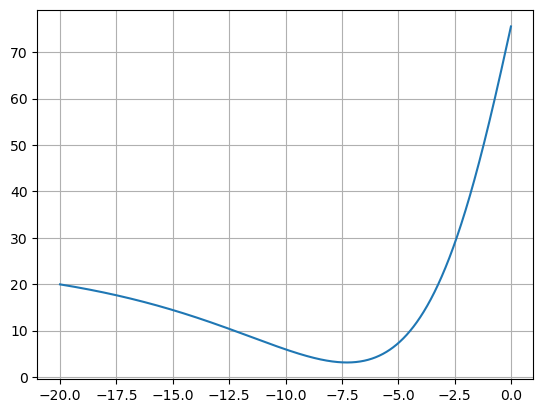

In [13]:
x_graph = np.arange(-20, 0, .01, dtype = float)
y_graph = []
for x in x_graph:
    y_graph.append(solveFirst(x))
    
plt.grid()
plt.plot(x_graph, y_graph)
pass

Минимум находится на интервале $(-10 ; -5)$

#### График второй функции `solveSecond`:

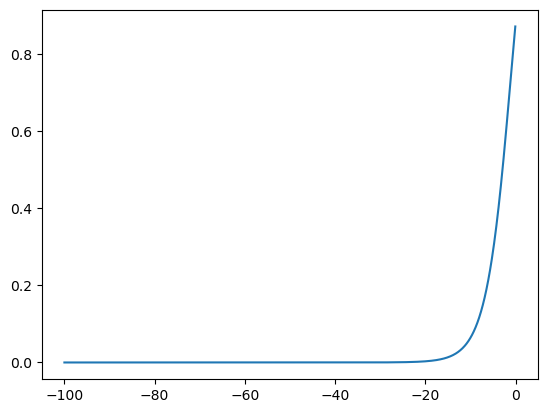

In [14]:
x_graph = np.arange(-100, 0, .1, dtype = float)
y_graph = []
for x in x_graph:
    y_graph.append(solveSecond(x))
    
plt.plot(x_graph, y_graph)
pass

Функция непрерывно возрастает, поэтому использовать метод одномерной минимизации бессмысленно.

Предположим, для второй функции
`_lambda = -1`

#### Построим график аппроксимации для первой группы:

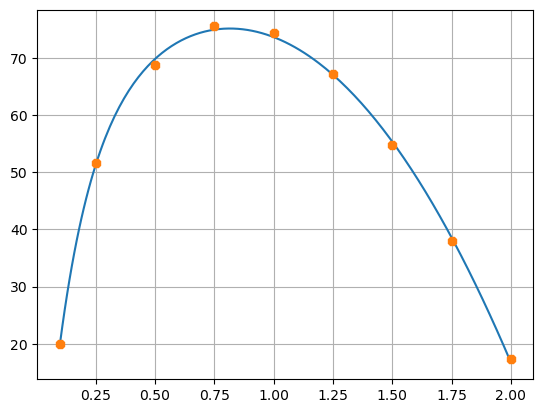

In [17]:
import scipy.optimize
_lambda = optimize.brent(solveFirst,brack=(-10,-5)) #Используем Метод Брента - одномерную минимизацию
t_val1 = np.arange(0.1, 2.01, 0.01)
C = LSQM(_lambda, y1)
y_val1 = func(_lambda, C, t_val1)

plt.grid()
plt.plot(t_val1, y_val1)
plt.plot(t, y1, '8')
pass

#### Построим график аппроксимации для первой группы:

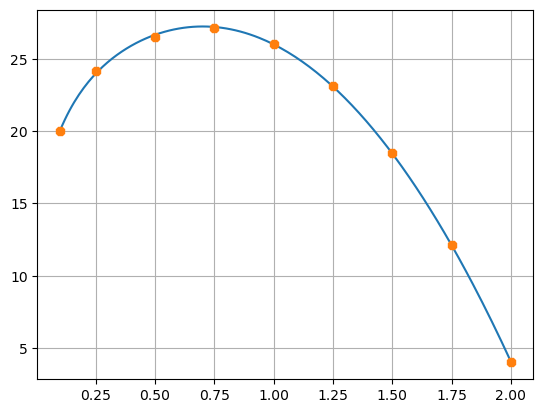

In [18]:
_lambda = -10

t_val2 = np.arange(0.1, 2.01, 0.01, dtype = float)
C = LSQM(_lambda, y2)
y_val2 = func(_lambda, C, t_val2)

plt.grid()
plt.plot(t_val2, y_val2)
plt.plot(t, y2, '8')
pass

## Вывод:
- Минимум для первой группы определяется единственным способом, т.к исходя из графика, минимум существует на определённом интервале

- График внешней функции у второй группы непрерывно возрастает, поэтому минимум определяется приблизительно.